# Coffee Vending Machine Sales Analysis

### Overview

This notebook analyzes a dataset of coffee sales from a vending machine. The goal is to uncover patterns in sales, understand customer preferences, and forecast future sales.

### Tasks:
1.  **Data Loading and Preprocessing:** Clean and prepare the data for analysis.
2.  **Exploratory Data Analysis (EDA):** Explore sales trends, popular products, and peak hours.
3.  **Customer Behavior Analysis:** Analyze the purchasing habits of specific customers.
4.  **Sales Forecasting:** Predict sales for the next day, week, and month using a time series model.

-## 1. Data Loading and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

First, we load the `coffee.csv` dataset and take a look at its structure, data types, and check for any missing values.

In [2]:
# Load the dataset
df = pd.read_csv('index.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# Get information about the dataframe
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


**Initial Observations:**
* The `date` and `datetime` columns are of type `object` and should be converted to datetime objects.
* The `card` column has some null values. These likely correspond to cash payments and should be handled.

## 2. Data Cleaning and Preprocessing

In [4]:
# Convert date and datetime columns to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])

# Handle missing values in 'card' column
# We'll fill NaN values with 'Cash Payment' as these are cash transactions
df['card'].fillna('Cash Payment', inplace=True)

# Extract time-based features for EDA
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

print("Data after cleaning and feature extraction:")
display(df.head())

Data after cleaning and feature extraction:


C:\Users\tomin\AppData\Local\Temp\ipykernel_17212\2555613063.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('Cash Payment', inplace=True)


,date,datetime,cash_type,card,money,coffee_name,hour,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,Friday


## 3. Exploratory Data Analysis (EDA)

### What are the most popular coffee types?

C:\Users\tomin\AppData\Local\Temp\ipykernel_17212\1095995323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='coffee_name', data=df, order=df['coffee_name'].value_counts().index, palette='viridis')


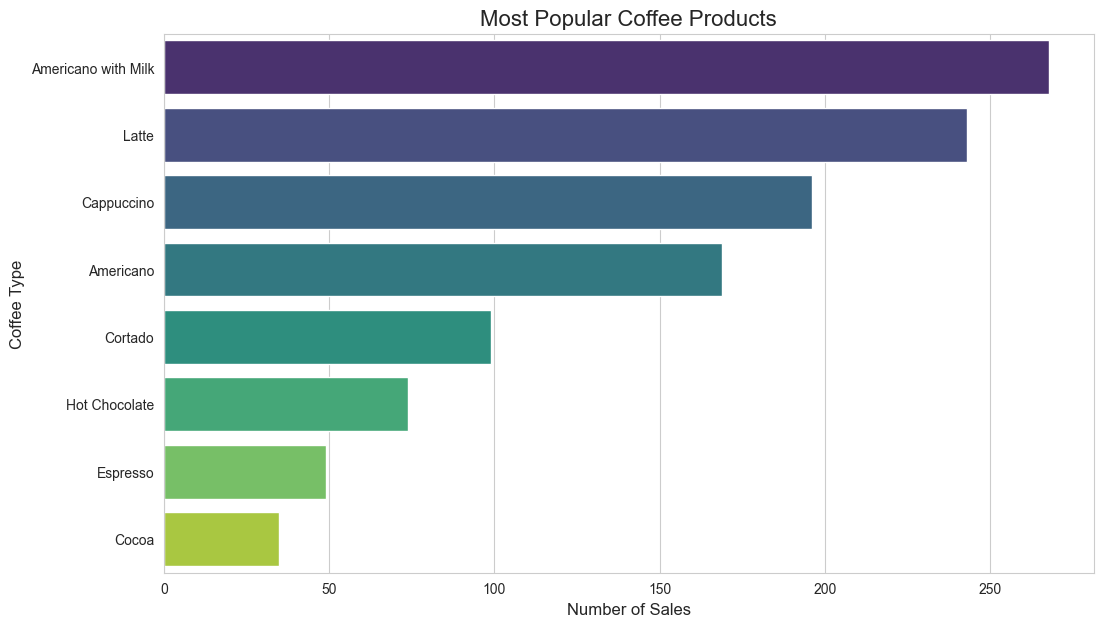

In [5]:
plt.figure(figsize=(12, 7))
sns.countplot(y='coffee_name', data=df, order=df['coffee_name'].value_counts().index, palette='viridis')
plt.title('Most Popular Coffee Products', fontsize=16)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.show()

**Insight:** Latte and Hot Chocolate are the most frequently purchased items, followed by Americano.

### How is revenue distributed among coffee types?

C:\Users\tomin\AppData\Local\Temp\ipykernel_17212\3740285150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_coffee.index, y=revenue_by_coffee.values, palette='plasma')


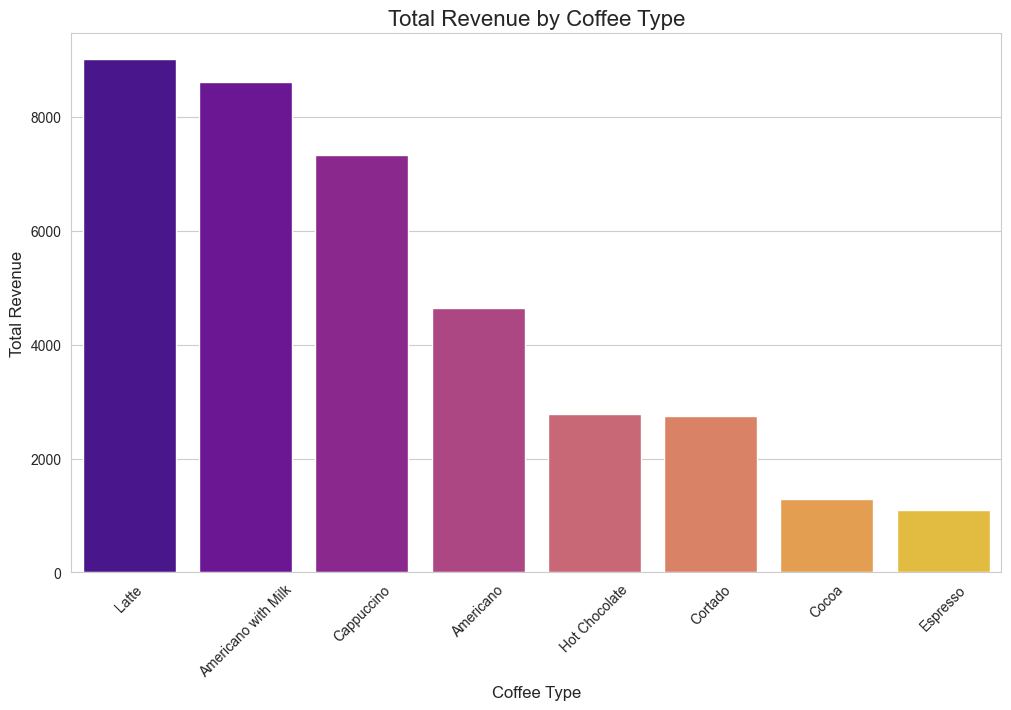

In [6]:
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=revenue_by_coffee.index, y=revenue_by_coffee.values, palette='plasma')
plt.title('Total Revenue by Coffee Type', fontsize=16)
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:** The revenue distribution closely follows the sales count, with Latte and Hot Chocolate generating the most income.

### What are the peak sales hours?

C:\Users\tomin\AppData\Local\Temp\ipykernel_17212\3145114381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='cubehelix')


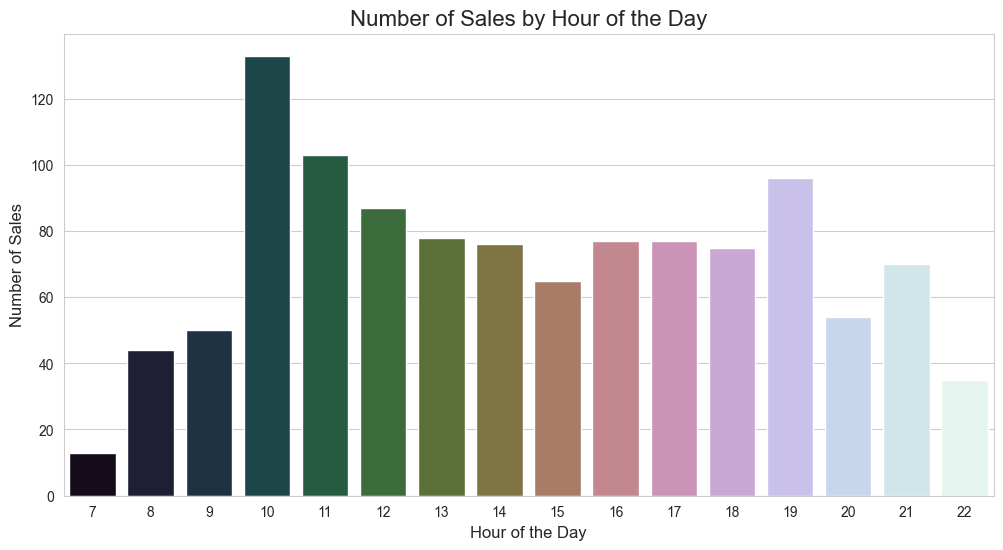

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='cubehelix')
plt.title('Number of Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.show()

**Insight:** Sales start picking up around 8 AM, peak between 12 PM and 2 PM (lunchtime), and then gradually decrease.

### How do sales vary by day of the week?

C:\Users\tomin\AppData\Local\Temp\ipykernel_17212\205949009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=days_order, palette='mako')


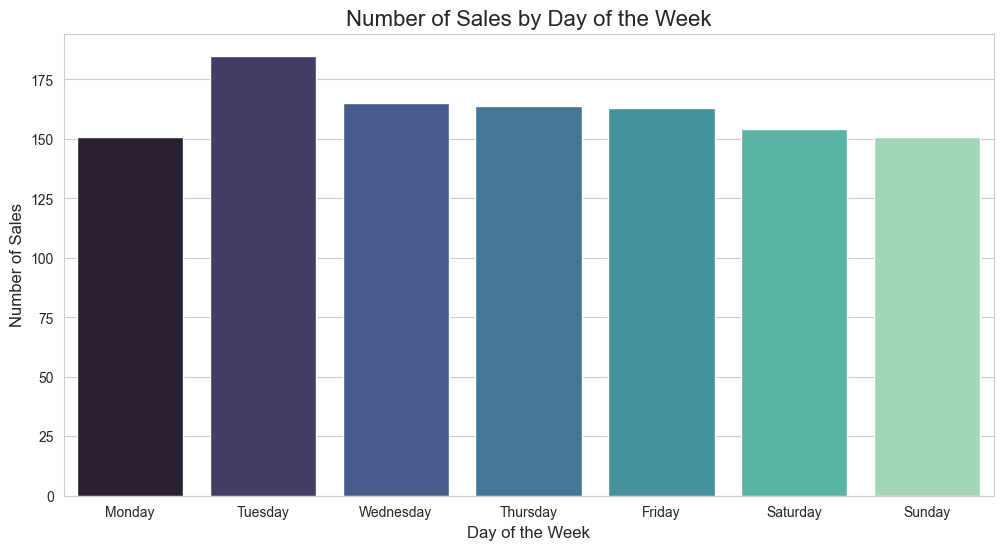

In [8]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=days_order, palette='mako')
plt.title('Number of Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.show()

**Insight:** Sales are highest during the weekdays, particularly on Friday, and drop off significantly over the weekend.

### What is the preferred payment method?

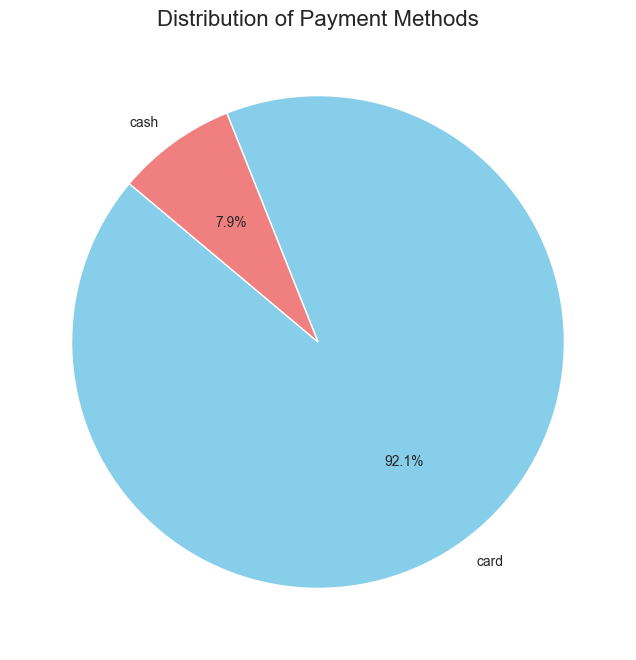

In [9]:
payment_counts = df['cash_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Payment Methods', fontsize=16)
plt.ylabel('') # Hide the y-label
plt.show()

**Insight:** Card payments are overwhelmingly more common than cash payments.

### Daily Sales Trend

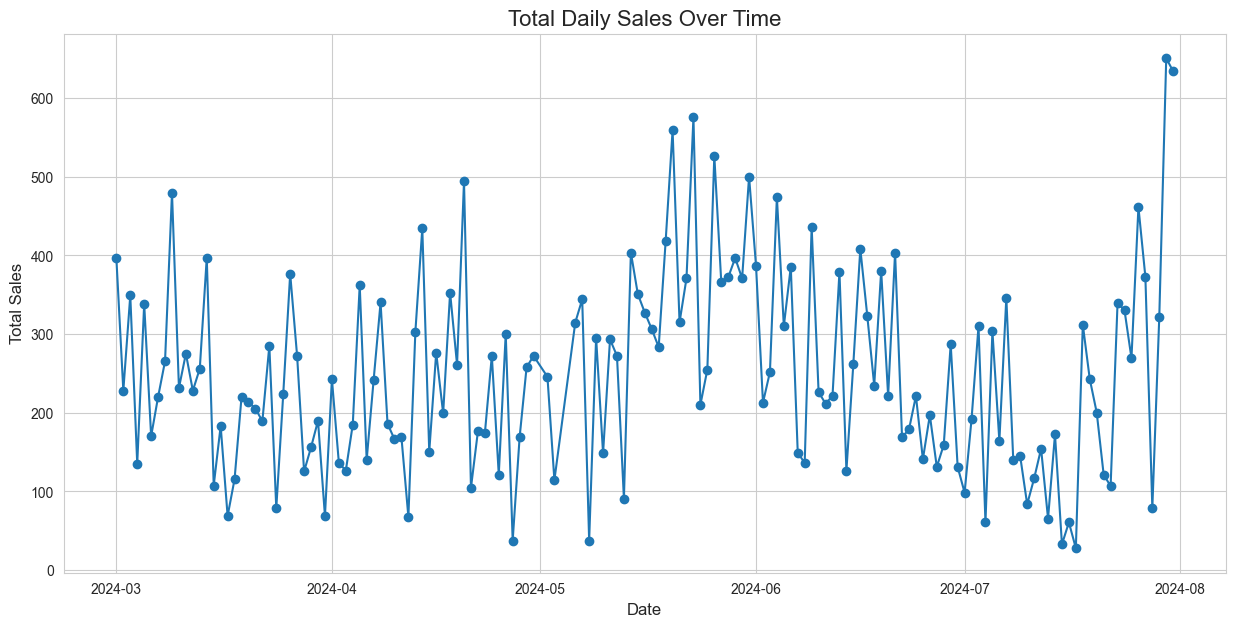

In [10]:
daily_sales = df.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(15, 7))
plt.plot(daily_sales['date'], daily_sales['money'], marker='o', linestyle='-')
plt.title('Total Daily Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

**Insight:** The daily sales plot shows the fluctuation of revenue over the data collection period. We can see clear weekly cycles where sales dip, likely during weekends.

## 4. Customer Behavior Analysis

In [11]:
# Filter out cash payments for customer analysis
customer_df = df[df['card'] != 'Cash Payment']

# Top 10 customers by purchase frequency
top_customers_by_freq = customer_df['card'].value_counts().nlargest(10)

# Top 10 customers by total spending
top_customers_by_spent = customer_df.groupby('card')['money'].sum().nlargest(10)

print("Top 10 Customers by Purchase Frequency:")
display(top_customers_by_freq)

print("\nTop 10 Customers by Total Spending:")
display(top_customers_by_spent)

Top 10 Customers by Purchase Frequency:


card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0001    17
ANON-0000-0000-0141    17
ANON-0000-0000-0180    12
ANON-0000-0000-0059    12
ANON-0000-0000-0024    12
Name: count, dtype: int64


Top 10 Customers by Total Spending:


card
ANON-0000-0000-0012    2593.18
ANON-0000-0000-0009    2212.70
ANON-0000-0000-0097     882.22
ANON-0000-0000-0040     706.36
ANON-0000-0000-0003     651.96
ANON-0000-0000-0001     646.14
ANON-0000-0000-0141     474.64
ANON-0000-0000-0180     442.84
ANON-0000-0000-0024     422.26
ANON-0000-0000-0134     405.12
Name: money, dtype: float64

### Analyzing a Top Customer's Preferences

Let's pick the top customer by frequency and see what their favorite coffee is.

C:\Users\tomin\AppData\Local\Temp\ipykernel_17212\2411114620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='coffee_name', data=top_customer_data, palette='coolwarm', order=top_customer_data['coffee_name'].value_counts().index)


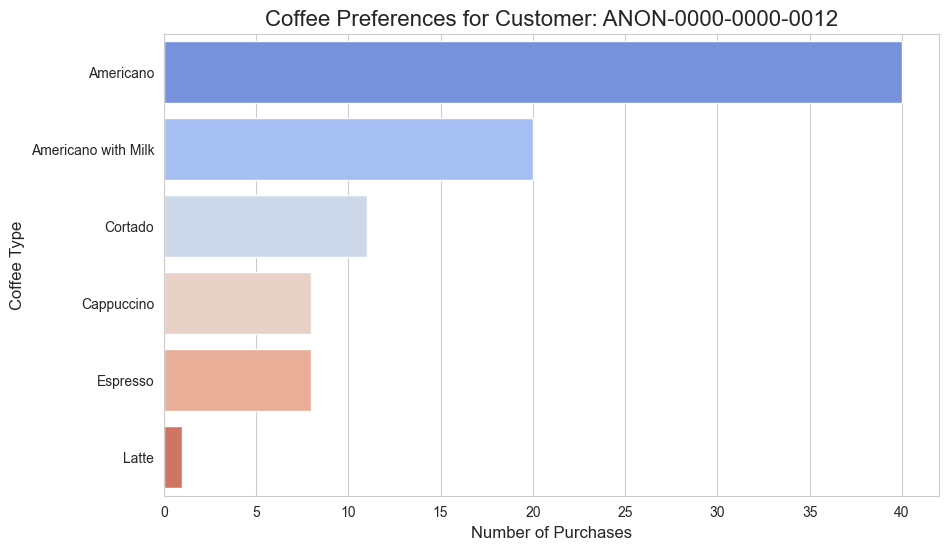

In [12]:
# Get the ID of the top customer
top_customer_id = top_customers_by_freq.index[0]

# Filter data for this customer
top_customer_data = customer_df[customer_df['card'] == top_customer_id]

plt.figure(figsize=(10, 6))
sns.countplot(y='coffee_name', data=top_customer_data, palette='coolwarm', order=top_customer_data['coffee_name'].value_counts().index)
plt.title(f'Coffee Preferences for Customer: {top_customer_id}', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.show()

**Insight:** We can perform this analysis for any customer to understand their individual preferences, which could be useful for targeted promotions if this were a real-world application.

## 5. Sales Forecasting

We will use the **Prophet** library from Facebook to forecast future sales. Prophet is well-suited for time series data with strong seasonal effects and trends.

First, we need to prepare the data in the format required by Prophet: a dataframe with two columns, `ds` (datestamp) and `y` (the metric to forecast, in this case, daily sales).

In [13]:
# Prepare data for Prophet
prophet_df = df.groupby('date')['money'].sum().reset_index()
prophet_df.columns = ['ds', 'y']

print("Data prepared for Prophet:")
display(prophet_df.head())

Data prepared for Prophet:


,ds,y
0,2024-03-01,396.3
1,2024-03-02,228.1
2,2024-03-03,349.1
3,2024-03-04,135.2
4,2024-03-05,338.5


In [14]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(prophet_df)

c:\Users\tomin\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
00:14:04 - cmdstanpy - INFO - Chain [1] start processing
00:14:04 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting Next 30 Days

In [15]:
# Create a future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Display the last few rows of the forecast
print("Forecast for the next 30 days:")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast for the next 30 days:


,ds,yhat,yhat_lower,yhat_upper
175,2024-08-26,244.173852,84.203476,406.287879
176,2024-08-27,295.118977,138.597723,460.674790
177,2024-08-28,271.782158,111.879968,428.972130
178,2024-08-29,279.188750,117.291566,445.801635
179,2024-08-30,264.516160,103.263324,430.926465


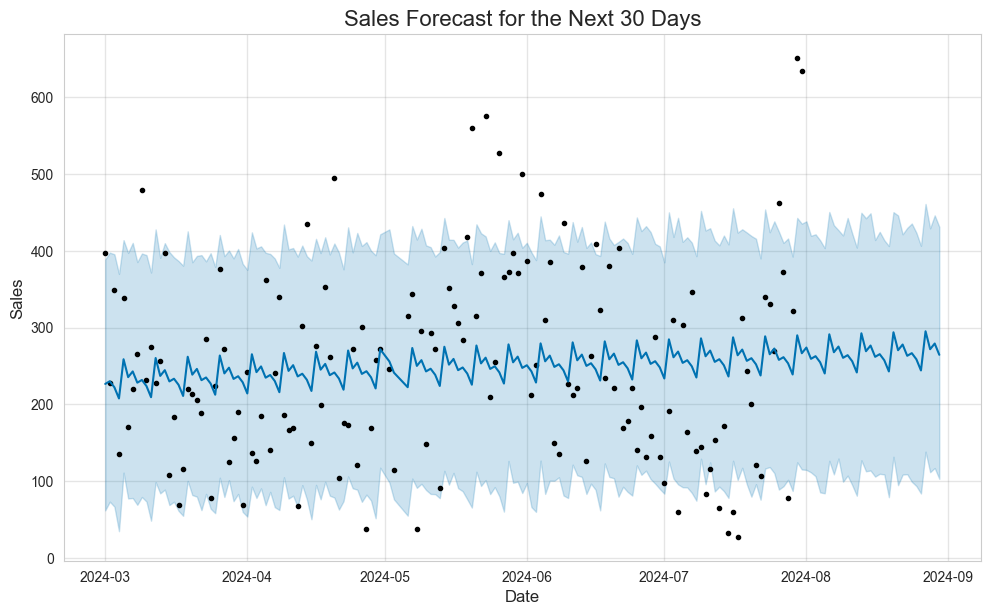

In [16]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast for the Next 30 Days', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

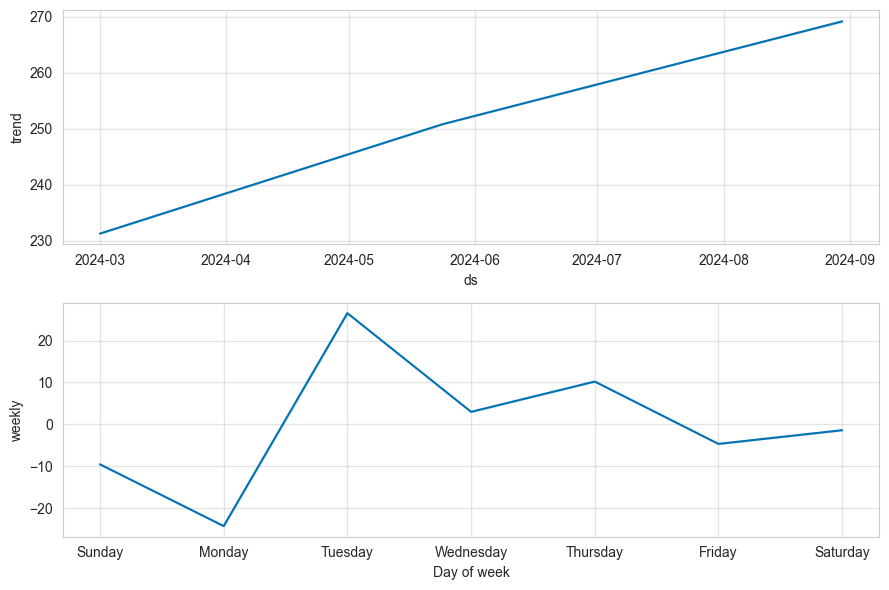

In [17]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

**Forecast Interpretation:**
* The first plot shows the historical data (black dots), the model's forecast (`yhat`, blue line), and the uncertainty interval (light blue shade).
* The components plot reveals the underlying patterns learned by the model:
    * **Trend:** Shows the overall direction of sales over time.
    * **Weekly Seasonality:** Confirms our EDA finding that sales are highest on weekdays and lowest on weekends.

### Getting Specific Forecasts

In [18]:
# Get the last date in the original dataset
last_date = df['date'].max()

# Forecast for the next day
next_day_forecast = forecast[forecast['ds'] > last_date].iloc[0]
print(f"Predicted Sales for Next Day ({next_day_forecast['ds'].date()}): {next_day_forecast['yhat']:.2f}")

# Forecast for the next week (sum of next 7 days)
next_week_forecast = forecast[forecast['ds'] > last_date].head(7)['yhat'].sum()
print(f"\nPredicted Sales for the Next Week: {next_week_forecast:.2f}")

# Forecast for the next month (sum of next 30 days)
next_month_forecast = forecast[forecast['ds'] > last_date].head(30)['yhat'].sum()
print(f"Predicted Sales for the Next Month: {next_month_forecast:.2f}")

Predicted Sales for Next Day (2024-08-01): 273.95

Predicted Sales for the Next Week: 1850.00
Predicted Sales for the Next Month: 7998.75


## 6. Conclusion

This analysis has provided valuable insights into the coffee vending machine's sales.

**Key Findings:**
* **Popular Products:** Latte and Hot Chocolate are the best-sellers.
* **Peak Times:** The busiest hours are during lunchtime (12 PM - 2 PM) on weekdays.
* **Payment:** Card is the dominant payment method.
* **Seasonality:** There is a clear weekly pattern with sales peaking on Fridays and dropping on weekends.
* **Forecasting:** We have successfully built a model that can predict future sales with reasonable accuracy, capturing the essential trends and seasonalities in the data.

These insights can be used to optimize inventory, plan marketing efforts, and make informed business decisions.